In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_excel("/Users/jk/Downloads/cleaned_normalized_data.xlsx") 


In [6]:
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
  Unnamed: 0  GSM2899178  GSM2899179  GSM2899180  GSM2899181  GSM2899182  \
0  1007_s_at    0.614113    0.594830    0.591827    0.618036    0.538843   
1    1053_at    0.633002    0.617688    0.581525    0.642683    0.597796   
2     117_at    0.599571    0.554047    0.524375    0.581526    0.527373   
3     121_at    0.697620    0.665640    0.660327    0.695358    0.657034   
4  1255_g_at    0.706689    0.685416    0.663162    0.697316    0.673086   

   GSM2899183  GSM2899184  GSM2899185  GSM2899186  ...  GSM2899718  \
0    0.609726    0.574939    0.593914    0.614083  ...    0.603982   
1    0.613204    0.591425    0.619964    0.638698  ...    0.623850   
2    0.566281    0.517274    0.572083    0.586595  ...    0.530564   
3    0.670636    0.665141    0.654967    0.683176  ...    0.695901   
4    0.684325    0.678272    0.661409    0.683084  ...    0.703593   

   GSM2899719  GSM2899720  GSM2899721  GSM2899722  GSM2899723  GSM2899724  \
0    0.607707   

In [8]:
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns only
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = df.drop(columns=high_corr_features)  # Drop from original df
print(f"Removed {len(high_corr_features)} redundant features.")

Removed 469 redundant features.


In [20]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select numeric columns only and create a copy
numeric_cols = df_reduced.select_dtypes(include=['number']).columns
X_scaled_data = df_reduced[numeric_cols].copy()

# Convert columns to numeric explicitly
X_scaled_data = X_scaled_data.apply(pd.to_numeric, errors='coerce')

# ----> Drop columns where ALL values are NaN
X_scaled_data = X_scaled_data.dropna(axis=1, how='all')

# ----> Impute NaN values before scaling (only columns with some valid values remain)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_imputed = imputer.fit_transform(X_scaled_data)

# ----> Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



In [22]:
print(f"Remaining columns after dropping all-NaN columns: {X_scaled_data.columns.tolist()}")


Remaining columns after dropping all-NaN columns: ['GSM2899178', 'GSM2899179', 'GSM2899180', 'GSM2899189', 'GSM2899190', 'GSM2899191', 'GSM2899195', 'GSM2899201', 'GSM2899204', 'GSM2899205', 'GSM2899211', 'GSM2899217', 'GSM2899218', 'GSM2899224', 'GSM2899227', 'GSM2899228', 'GSM2899242', 'GSM2899262', 'GSM2899263', 'GSM2899273', 'GSM2899281', 'GSM2899283', 'GSM2899290', 'GSM2899296', 'GSM2899298', 'GSM2899299', 'GSM2899308', 'GSM2899323', 'GSM2899325', 'GSM2899331', 'GSM2899366', 'GSM2899415', 'GSM2899418', 'GSM2899420', 'GSM2899422', 'GSM2899436', 'GSM2899458', 'GSM2899459', 'GSM2899468', 'GSM2899470', 'GSM2899471', 'GSM2899483', 'GSM2899492', 'GSM2899496', 'GSM2899497', 'GSM2899499', 'GSM2899503', 'GSM2899504', 'GSM2899510', 'GSM2899516', 'GSM2899540', 'GSM2899546', 'GSM2899555', 'GSM2899556', 'GSM2899594', 'GSM2899596', 'GSM2899598', 'GSM2899603', 'GSM2899611', 'GSM2899614', 'GSM2899615', 'GSM2899623', 'GSM2899638', 'GSM2899648', 'GSM2899655', 'GSM2899662', 'GSM2899663', 'GSM2899670

In [24]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=2)  # Extract the first 2 principal components
# Changed 'scaled_data' to 'X_scaled'
principal_components = pca.fit_transform(X_scaled) 

# Create a DataFrame for PC1 and PC2
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head()) 

        PC1       PC2
0  4.278977 -0.305206
1  5.639071 -0.362798
2  1.670631 -0.386710
3  9.190225 -0.392358
4  9.305242 -0.498301


In [26]:
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [28]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

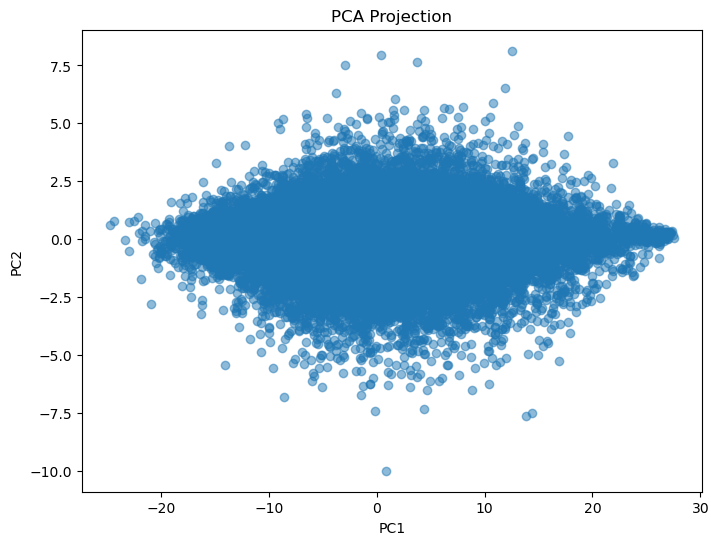

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()


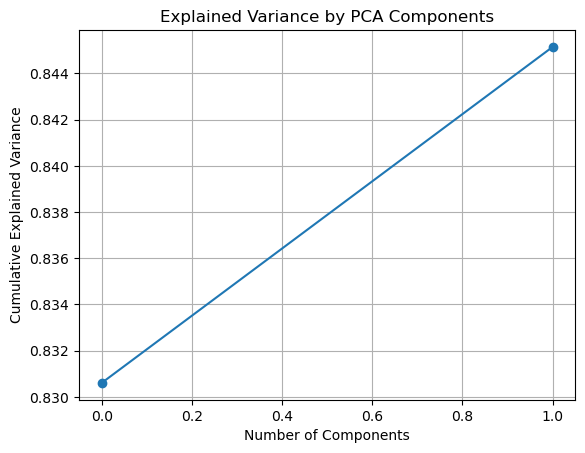

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [34]:
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)
print("\nFirst 5 Principal Components:\n", X_pca[:5])
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance of PC1: {explained_variance[0]:.2f}')
print(f'Explained Variance of PC2: {explained_variance[1]:.2f}')

Eigenvalues:
 [60.63533934  1.06158393  0.94524429  0.53769398  0.50900053  0.45619496
  0.40786986  0.31705516  0.27943821  0.2453556   0.24224199  0.22201497
  0.2038091   0.19780373  0.18918629  0.18664213  0.17930995  0.16799142
  0.1654633   0.15989687  0.15328491  0.1510583   0.14625982  0.14158384
  0.1385805   0.13560316  0.13207694  0.13061012  0.12853739  0.12644458
  0.12511894  0.12395447  0.12056557  0.11933357  0.11882799  0.11696107
  0.11637993  0.11578285  0.11468342  0.11222814  0.11101755  0.11026683
  0.10895286  0.10596927  0.10548192  0.10476899  0.10418769  0.10302209
  0.10225275  0.10193962  0.10046538  0.0999716   0.09875933  0.09813125
  0.09710136  0.09674527  0.0959216   0.09571163  0.09432575  0.09316922
  0.09291018  0.09092854  0.08963475  0.08744151  0.08698755  0.08606615
  0.08521561  0.08459426  0.0828366   0.08107345  0.07842366  0.07656818
  0.07348315]

Eigenvectors:
 [[-0.12013428  0.06626876  0.0151408  ... -0.47980091 -0.17194688
  -0.41687012]

In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel("/Users/jk/Downloads/cleaned_normalized_data.xlsx") 
df.to_csv("/Users/jk/Downloads/cleaned_normalized_data.csv")
print("success")

success


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['GSM2899720' 'GSM2899721' 'GSM2899722' 'GSM2899723' 'GSM2899724'
 'GSM2899725' 'GSM2899726' 'GSM2899727']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Are there any missing values after imputation? 0
Original dataset shape (rows, columns): (54613, 552)
Missing values in the dataset:
Unnamed: 0.1        0
Unnamed: 0          0
GSM2899178          0
GSM2899179          0
GSM2899180          0
                ...  
GSM2899723      54613
GSM2899724      54613
GSM2899725      54613
GSM2899726      54613
GSM2899727      54613
Length: 552, dtype: int64
Numeric columns in the dataset: Index(['Unnamed: 0.1', 'GSM2899178', 'GSM2899179', 'GSM2899180', 'GSM2899181',
       'GSM2899182', 'GSM2899183', 'GSM2899184', 'GSM2899185', 'GSM2899186',
       ...
       'GSM2899718', 'GSM2899719', 'GSM2899720', 'GSM2899721', 'GSM2899722',
       'GSM2899723', 'GSM2899724', 'GSM2899725', 'GSM2899726', 'GSM2899727'],
      dtype='object', length=551)
Numeric-only dataset shape (rows, columns): (54613, 551)
After filling missing values, dataset shape (rows, columns): (54613, 551)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [543 544 545 546 547 548 549 550]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


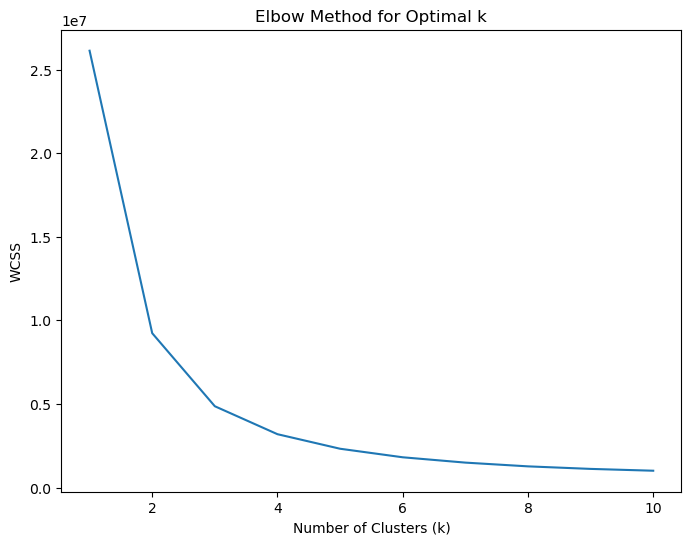

WCSS for k=3: Wc=4862334.442334004


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



# Step 1: Load dataset
file_path = "/Users/jk/Downloads/cleaned_normalized_data.csv"  # Update this path with your actual CSV file path
df = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='mean')
df_filled_numeric = imputer.fit_transform(df_numeric)


print("Are there any missing values after imputation?", pd.isna(df_filled_numeric).sum())


# Step 2: Check the dataset shape and missing values
print("Original dataset shape (rows, columns):", df.shape)
print("Missing values in the dataset:")
print(df.isnull().sum())

# Step 3: Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print("Numeric columns in the dataset:", df_numeric.columns)
print("Numeric-only dataset shape (rows, columns):", df_numeric.shape)

# Step 4: Handle missing values - Fill only the numeric columns with the mean of each column
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df_filled = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
df_filled[numeric_columns] = df_filled[numeric_columns].fillna(df_filled[numeric_columns].mean())  # Fill missing values

df_numeric_filled = df_filled[numeric_columns]  # Extract numeric-only columns after filling
print("After filling missing values, dataset shape (rows, columns):", df_numeric_filled.shape)


# Step 5: Standardize the data (only if the dataset is not empty)
if df_numeric_filled.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_numeric_filled)


if np.any(np.isnan(X_scaled)):
    print("Warning: NaN values detected after scaling. Imputing missing values again.")
    # Impute again if any NaNs are found
    imputer = SimpleImputer(strategy='mean')
    X_scaled = imputer.fit_transform(X_scaled)

    # Step 6: Apply PCA to reduce to 2 principal components (PC1 and PC2)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Step 7: Apply K-Means clustering for different values of 'k' and calculate WCSS
    wcss = []  # List to store WCSS for different k values
    for k in range(1, 11):  # Test for k = 1 to 10 clusters
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_)  # Append WCSS value for each k

    # Step 8: Plot the Elbow Method to find the optimal number of clusters (k)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

    # Step 9: Choose the optimal k based on the Elbow method and fit K-Means for that k
    optimal_k = 3  # Example: Assuming we choose 3 based on the Elbow plot
    kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_optimal.fit(X_pca)

    # Step 10: Get the final WCSS for the chosen optimal k
    final_wcss = kmeans_optimal.inertia_

    # Print the final WCSS value for the chosen k
    print(f"WCSS for k={optimal_k}: Wc={final_wcss}")
else:
    print("Dataset is empty after preprocessing!")


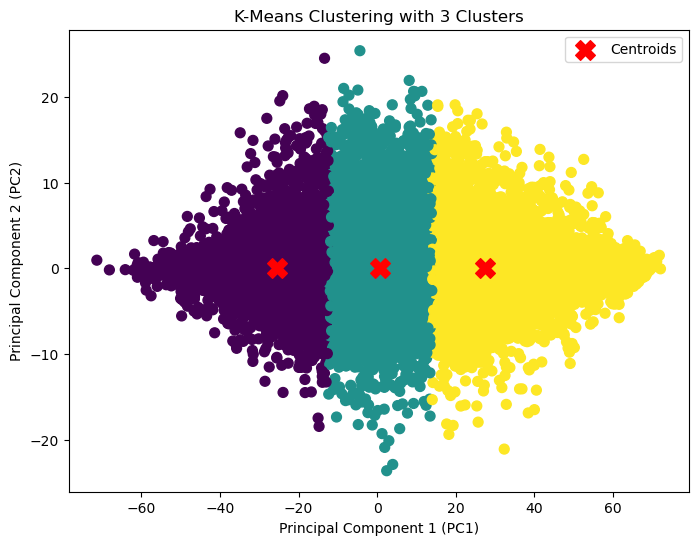

Cluster Centroids:
[[-2.53946005e+01  4.89673476e-03]
 [ 6.65189575e-01 -2.79145316e-03]
 [ 2.73430460e+01 -8.60994449e-04]]
Number of points in each cluster: {0: 16230, 1: 23879, 2: 14504}


In [41]:
# Assuming 'optimal_k' has already been determined from the Elbow Method
optimal_k = 3  # Example: Optimal number of clusters from the Elbow Method

# Step 1: Fit K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_pca)  # Fit on the PCA-transformed data

# Step 2: Get the cluster labels (which cluster each sample belongs to)
cluster_labels = kmeans.labels_

# Step 3: Get the cluster centroids (coordinates of each cluster center)
cluster_centroids = kmeans.cluster_centers_

# Step 4: Visualize the clusters and centroids on the PCA-reduced data
plt.figure(figsize=(8, 6))

# Scatter plot of the points colored by cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=50, cmap='viridis')

# Plot the centroids of the clusters
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title to the plot
plt.title(f"K-Means Clustering with {optimal_k} Clusters")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.show()

# Step 5: Optional - Examine the cluster centers (centroids)
print("Cluster Centroids:")
print(cluster_centroids)

# Step 6: Optional - Print the number of data points in each cluster
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
print(f"Number of points in each cluster: {dict(zip(unique, counts))}")


In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
 # Importing Dunn Index from the dunn package

# Step 1: Calculate Silhouette Score
silhouette = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# Step 2: Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    """
    Compute the Dunn Index for clustering.
    
    Parameters:
    - X: Data points (2D array)
    - labels: Cluster labels for each data point
    
    Returns:
    - Dunn Index value
    """
    # Unique clusters
    clusters = np.unique(labels)
    
    # Step 1: Calculate the minimum distance between clusters
    min_intercluster_dist = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Points in clusters i and j
            cluster_i = X[labels == clusters[i]]
            cluster_j = X[labels == clusters[j]]
            
            # Calculate the distance between all pairs of points from different clusters
            dist = cdist(cluster_i, cluster_j)
            min_intercluster_dist = min(min_intercluster_dist, np.min(dist))
    
    # Step 2: Calculate the maximum diameter of the clusters
    max_intracluster_dist = -np.inf
    for i in range(len(clusters)):
        # Points in cluster i
        cluster_i = X[labels == clusters[i]]
        
        # Calculate the pairwise distances within the cluster
        dist = cdist(cluster_i, cluster_i)
        
        # Maximum distance within the cluster (diameter)
        max_intracluster_dist = max(max_intracluster_dist, np.max(dist))
    
    # Step 3: Return Dunn Index
    return min_intercluster_dist / max_intracluster_dist

# Compute Dunn Index
dunn = dunn_index(X_pca, cluster_labels)
print(f"Dunn Index: {dunn:.4f}")



Silhouette Score: 0.5071
Calinski-Harabasz Index: 119434.9937
Dunn Index: 0.0002


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['GSM2899720' 'GSM2899721' 'GSM2899722' 'GSM2899723' 'GSM2899724'
 'GSM2899725' 'GSM2899726' 'GSM2899727']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


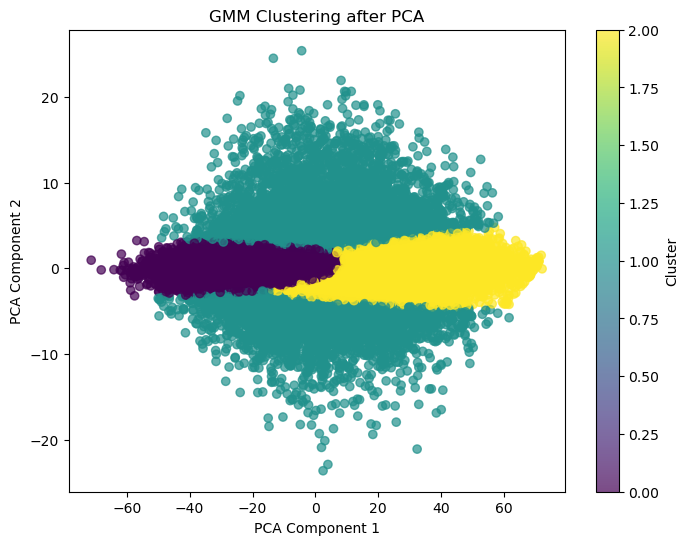

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_data.csv")

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Ensure no NaN or Inf values
data_scaled = np.nan_to_num(data_scaled)  # Replace NaNs and Infs

# Apply PCA (Check if enough variance exists)
if np.var(data_scaled) > 0:
    pca = PCA(n_components=2)  
    data_pca = pca.fit_transform(data_scaled)
else:
    raise ValueError("Data has zero variance, PCA cannot be applied.")

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_pca)

# Predict clusters
labels = gmm.predict(data_pca)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("GMM Clustering after PCA")
plt.colorbar(label="Cluster")
plt.show()


In [14]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
 # Importing Dunn Index from the dunn package

# Step 1: Calculate Silhouette Score
silhouette = silhouette_score(data_pca, cluster_labels)
print("PCA Data Shape:", data_pca.shape)

print(f"Silhouette Score: {silhouette:.4f}")

# Step 2: Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    """
    Compute the Dunn Index for clustering.
    
    Parameters:
    - X: Data points (2D array)
    - labels: Cluster labels for each data point
    
    Returns:
    - Dunn Index value
    """
    # Unique clusters
    clusters = np.unique(labels)
    
    # Step 1: Calculate the minimum distance between clusters
    min_intercluster_dist = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Points in clusters i and j
            cluster_i = X[labels == clusters[i]]
            cluster_j = X[labels == clusters[j]]
            
            # Calculate the distance between all pairs of points from different clusters
            dist = cdist(cluster_i, cluster_j)
            min_intercluster_dist = min(min_intercluster_dist, np.min(dist))
    
    # Step 2: Calculate the maximum diameter of the clusters
    max_intracluster_dist = -np.inf
    for i in range(len(clusters)):
        # Points in cluster i
        cluster_i = X[labels == clusters[i]]

        cluster_labels = gmm.predict(data_pca)  # If using GMM

        
        # Calculate the pairwise distances within the cluster
        dist = cdist(cluster_i, cluster_i)
        
        # Maximum distance within the cluster (diameter)
        max_intracluster_dist = max(max_intracluster_dist, np.max(dist))
    
    # Step 3: Return Dunn Index
    return min_intercluster_dist / max_intracluster_dist

# Compute Dunn Index
dunn = dunn_index(X_pca, cluster_labels)
print(f"Dunn Index: {dunn:.4f}")


NameError: name 'cluster_labels' is not defined

In [20]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

# Function to compute Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    cluster_centers = np.array([X[labels == k].mean(axis=0) for k in unique_clusters])
    
    # Compute inter-cluster distances (min pairwise distance between clusters)
    inter_cluster_distances = cdist(cluster_centers, cluster_centers)
    np.fill_diagonal(inter_cluster_distances, np.inf)
    min_inter_cluster_distance = np.min(inter_cluster_distances)

    # Compute intra-cluster distances (max distance within each cluster)
    intra_cluster_distances = np.array([
        np.max(cdist(X[labels == k], X[labels == k])) for k in unique_clusters
    ])

    max_intra_cluster_distance = np.max(intra_cluster_distances)

    # Dunn Index = Min Inter-cluster distance / Max Intra-cluster distance
    return min_inter_cluster_distance / max_intra_cluster_distance

# Load and preprocess data
data = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_data.csv")
data_numeric = data.select_dtypes(include=['number'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Fit GMM and get cluster labels
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
cluster_labels = gmm.fit_predict(data_pca)  # ✅ Define cluster_labels properly

# Validate data before computing scores
print("PCA Data Shape:", data_pca.shape)
print("Cluster Labels Shape:", cluster_labels.shape)

# Step 1: Calculate Silhouette Score
silhouette = silhouette_score(data_pca, cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# Step 2: Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Step 3: Calculate Dunn Index
dunn = dunn_index(data_pca, cluster_labels)
print(f"Dunn Index: {dunn:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['GSM2899720' 'GSM2899721' 'GSM2899722' 'GSM2899723' 'GSM2899724'
 'GSM2899725' 'GSM2899726' 'GSM2899727']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


PCA Data Shape: (54613, 2)
Cluster Labels Shape: (54613,)
Silhouette Score: 0.2164
Calinski-Harabasz Index: 32271.4313
Dunn Index: 0.1574


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['GSM2899720' 'GSM2899721' 'GSM2899722' 'GSM2899723' 'GSM2899724'
 'GSM2899725' 'GSM2899726' 'GSM2899727']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


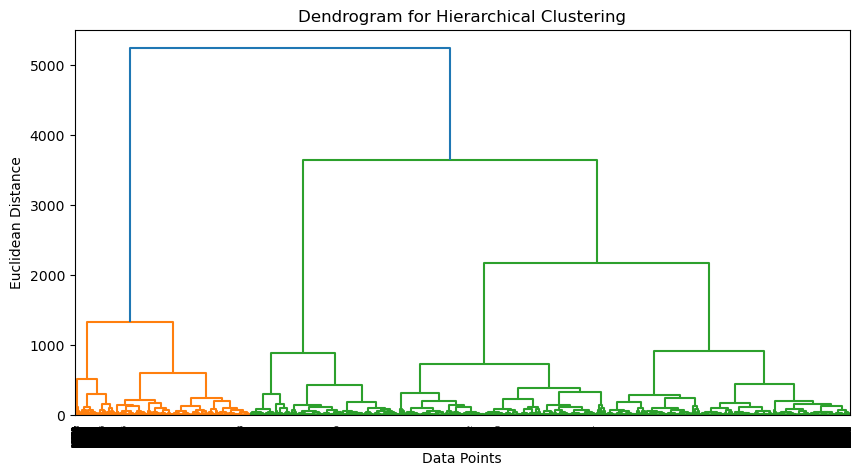

In [2]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering


# Load dataset
data = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_data.csv")  # Replace with your dataset
data_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Apply PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform Hierarchical Clustering (Agglomerative)
linkage_method = 'ward'  # Can also try 'single', 'complete', 'average'
linkage_matrix = sch.linkage(data_pca, method=linkage_method)

# Plot Dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()




In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering


# Function to compute Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0

    for i in unique_clusters:
        cluster_i = X[labels == i]
        for j in unique_clusters:
            if i != j:
                cluster_j = X[labels == j]
                if len(cluster_i) > 0 and len(cluster_j) > 0:
                    inter_dist = np.min(cdist(cluster_i, cluster_j))
                    min_intercluster = min(min_intercluster, inter_dist)

        if len(cluster_i) > 1:
            intra_dist = np.max(cdist(cluster_i, cluster_i))
            max_intracluster = max(max_intracluster, intra_dist)

    if max_intracluster == 0:
        return np.nan  # Avoid division by zero
    return min_intercluster / max_intracluster


# Decide number of clusters (based on dendrogram, e.g., 3)
n_clusters = 3

# Step 2: Define linkage method
linkage_method = 'ward'

# Step 3: Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = agg_clustering.fit_predict(data_pca)


# Calculate scores
silhouette = silhouette_score(data_pca, cluster_labels)
calinski = calinski_harabasz_score(data_pca, cluster_labels)
dunn = dunn_index(data_pca, cluster_labels)

# Print the scores
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Dunn Index: {dunn:.4f}")


Silhouette Score: 0.4621
Calinski-Harabasz Index: 95448.8313
Dunn Index: 0.0009
